<a href="https://colab.research.google.com/github/Raanank10/Instagram-s-influencers/blob/Eladk_20220324/Instagram_Influencers_V4_New_Data_MAR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram_influencers**

# Global Parameters

In [3]:
path_part0 = 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/ai_posts_analysis_data.xlsx'
fname = 'ai_posts_analysis_data.xlsx'

path_part1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part1.csv'
path_part2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part2.csv'



# path_part3= 'project (1).csv'
# path_part4= 'project (4).csv'

train_size = 0.75
rand_state = 3455
sigma = 3
Min_followers = 500

# Bining
bin_labels=['Low','Medium','High', 'Very High','Extreme']

In [4]:
path_part1_1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_1_jan22_part_1.csv'
path_part1_2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_1_jan22_part_2.csv'

In [5]:
path_part4_1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_1.csv'
path_part4_2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_2.csv'
path_part4_3= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_3.csv'
path_part4_4= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_4_jan22_part_4.csv'

In [6]:
def what_is_better(diff, percent = None):
  if not percent:
    percent = 10
  if diff > percent:
    res = 1
  elif diff < -1 * percent:
    res = -1
  elif (diff < percent or diff > percent):
    res = 0
  else:
    res = np.NaN
  return res

In [7]:
# Run the code to install DataPrep
!pip install dataprep
!pip install category_encoders

     |████████████████████████████████| 3.7 MB 4.4 MB/s 
     |████████████████████████████████| 1.5 MB 43.5 MB/s 
     |████████████████████████████████| 965 kB 9.9 MB/s 
     |████████████████████████████████| 749 kB 40.2 MB/s 
     |████████████████████████████████| 1.0 MB 46.6 MB/s 
     |████████████████████████████████| 132 kB 46.8 MB/s 
     |████████████████████████████████| 95 kB 4.0 MB/s 
     |████████████████████████████████| 366 kB 45.7 MB/s 
     |████████████████████████████████| 1.1 MB 52.6 MB/s 
     |████████████████████████████████| 10.9 MB 30.4 MB/s 
     |████████████████████████████████| 110 kB 42.0 MB/s 
     |████████████████████████████████| 943 kB 42.2 MB/s 
     |████████████████████████████████| 271 kB 10.3 MB/s 
     |████████████████████████████████| 144 kB 29.3 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
     |████████████████████████████████| 134 kB 27.6 MB/s 
     |████████████████████████████████| 289 kB 42.8 MB/s 
     |█████████████

In [8]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import missingno as msno
import xgboost as xgb
import datetime

# SK Learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score , confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report # elad 20210708
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import OrdinalEncoder # elad 20210911
import category_encoders as ce # elad 20220218

# Trees Visualization
import pydot
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Misc
import warnings
from sys import modules
from time import time
from platform import python_version
from google.colab import files

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# IPython
from IPython.display import Image, display

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

# EDA prep
from dataprep.eda import plot, plot_correlation, plot_missing, create_report


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Pipeline 1 Get the Data

Concate the 3 files

In [9]:
df_part0 = pd.read_csv(path_part0, index_col=0)
df_part1 = pd.read_csv(path_part1, index_col=0)
df_part2 = pd.read_csv(path_part2, index_col=0)

In [10]:
df_path_part1_1 = pd.read_csv(path_part1_1, index_col=0)
df_path_part1_1.dropna(how='all',inplace=True)
print('path_part1_1 shape=',(df_path_part1_1.shape))
df_path_part1_2 = pd.read_csv(path_part1_2, index_col=0)
df_path_part1_2.dropna(how='all',inplace=True)
print('path_part1_2 shape=',(df_path_part1_2.shape))
df_part3 = pd.concat([df_path_part1_1, df_path_part1_2])
print('df_part3 shape=',(df_part3.shape))

df_part3['DATA_SOURCE'] = 'Project 1'

path_part1_1 shape= (18082, 26)
path_part1_2 shape= (17975, 26)
df_part3 shape= (36057, 26)


In [11]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 1918 to 37974
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                     

eladk 10-Jan-2022

In [12]:
df_path_part4_1 = pd.read_csv(path_part4_1, index_col=0)
df_path_part4_1.dropna(how='all',inplace=True)
print('df_path_part4_1 shape=',(df_path_part4_1.shape))

df_path_part4_2 = pd.read_csv(path_part4_2, index_col=0)
df_path_part4_2.dropna(how='all',inplace=True)
print('path_part4_2 shape=',(df_path_part4_2.shape))

df_path_part4_3 = pd.read_csv(path_part4_3, index_col=0)
df_path_part4_3.dropna(how='all',inplace=True)
print('path_part4_3 shape=',(df_path_part4_3.shape))


df_path_part4_4 = pd.read_csv(path_part4_4, index_col=0)
df_path_part4_4.dropna(how='all',inplace=True)
print('path_part4_4 shape=',(df_path_part4_4.shape))

df_part4 = pd.concat([df_path_part4_1, df_path_part4_2, df_path_part4_3, df_path_part4_4])

df_part4['DATA_SOURCE'] = 'Project 4'

print('df_part4 shape=',(df_part4.shape))

df_path_part4_1 shape= (15104, 37)
path_part4_2 shape= (20000, 37)
path_part4_3 shape= (20000, 37)
path_part4_4 shape= (2817, 37)
df_part4 shape= (57921, 38)


In [13]:
print('df_part4 len=',len(df_part3.columns))
print('df_part4 len=',len(df_part4.columns))

df_part4 len= 27
df_part4 len= 38


In [14]:
df_part4_USER_BIO = df_part4[['Post Image',	'User Bio',	'User bio interest',	'User Country',	'Audience Interest',	'User gender',	'User Age',	'Verified?',	'User Interests',	'User City',	'User Category']]

In [15]:
print('df_part4 len=',len(df_part3.columns))
print('df_part4 len=',len(df_part4.columns))
print('df_part4_USER_BIO len=',len(df_part4_USER_BIO.columns))

df_part4 len= 27
df_part4 len= 38
df_part4_USER_BIO len= 11


In [16]:
df_part4 = df_part4.drop(columns=['Post Image',	'User Bio',	'User bio interest',	'User Country',	'Audience Interest',	'User gender',	'User Age',	'Verified?',	'User Interests',	'User City',	'User Category'])

In [17]:
print('df_part4 len=',len(df_part3.columns))
print('df_part4 len=',len(df_part4.columns))
print('df_part4_USER_BIO len=',len(df_part4_USER_BIO.columns))

df_part4 len= 27
df_part4 len= 27
df_part4_USER_BIO len= 11


In [18]:
df = pd.concat([df_part3, df_part4])
print(f'data len After concat all 3 parts = {len(df)}')

data len After concat all 3 parts = 93978


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 93978 entries, 1918.0 to 62816.0
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          93978 non-null  float64
 1   USERNAME                        93978 non-null  object 
 2   FULLNAME                        90672 non-null  object 
 3   FOLLOWER                        93978 non-null  float64
 4   POST ID                         93978 non-null  float64
 5   SHORTCODE                       93978 non-null  object 
 6   LIKES                           93978 non-null  float64
 7   COMMENTS                        93978 non-null  float64
 8   ENGAGEMENT                      93978 non-null  float64
 9   URL                             93978 non-null  object 
 10  ACCESSIBILITY CAPTION           73755 non-null  object 
 11  CAPTION                         77446 non-null  object 
 12  LOCATION               

In [20]:
# df.to_csv('data_output_PL1.csv') 
# files.download('data_output_PL1.csv')

# Pipeline 2 Data processing and Feature Engineering

## Data processing

In [21]:
print(f'Number of Duplicate Rows = {len(df[df.index.duplicated()])}')
df = df[~df.index.duplicated()]

Number of Duplicate Rows = 32412


In [22]:
print(f'Number of row of influencers with less than \
{Min_followers} followers = {len(df[df.FOLLOWER < Min_followers])}')

print(f'Number of row of influencers with more than \
{Min_followers} followers = {len(df[df.FOLLOWER > Min_followers])}')

df = df[df.FOLLOWER >= Min_followers]


Number of row of influencers with less than 500 followers = 22800
Number of row of influencers with more than 500 followers = 38706


### Remove Unnecessary Columns

Remove unnecessary columns from Dataframe, should be done in X

In [23]:
df.drop(['POST ID','VIDEO URL','SHORTCODE','IMAGE URL','FULLNAME','USERID',\
         'URL','VIDEO VIEW COUNT','URL'], inplace=True, axis=1)

Remove column that all values are unique:

In [24]:
for col in df.columns:
    if len(df[col].unique()) == len(df):
        print(col)
        #df.drop(col,inplace=True,axis=1)

df_original is holding the original data without any changes but droping unused columns and duplicates  

In [25]:
df_original = df.copy()

In [26]:
df.columns = df.columns.str.replace(' ', '_')

In [27]:
df = df[df['ENGAGEMENT'].notna()]
df = df[df['LIKES'].notna()]
df = df[df['COMMENTS'].notna()]
print(f'After remove lines with no data on ENGAGEMENT, LIKES, COMMENTS = {len(df)}')

After remove lines with no data on ENGAGEMENT, LIKES, COMMENTS = 38766


# Pipeline 3 Feature Engineering

Create Log columns (likes, comments and engagement) for prediction 

In [28]:
df['log_ENGAGEMENT'] = np.log10(df.ENGAGEMENT+0.0001)
df['log_LIKES'] = np.log10(df.LIKES+0.0001)
df['log_COMMENTS'] = np.log10(df.COMMENTS+0.0001)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 38766 entries, 1918.0 to 62808.0
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERNAME                        38766 non-null  object 
 1   FOLLOWER                        38766 non-null  float64
 2   LIKES                           38766 non-null  float64
 3   COMMENTS                        38766 non-null  float64
 4   ENGAGEMENT                      38766 non-null  float64
 5   ACCESSIBILITY_CAPTION           30274 non-null  object 
 6   CAPTION                         35798 non-null  object 
 7   LOCATION                        13585 non-null  object 
 8   CITY                            12148 non-null  object 
 9   COUNTRY                         10894 non-null  object 
 10  TIME                            38766 non-null  float64
 11  IMAGE_LABELS                    38747 non-null  object 
 12  CAPTION_INTEREST       

outliers

In [30]:
# orig_len = len(df)

# for col in df.columns:
#     if df[col].dtype == 'float64': # select only number columns
#         std = df[col].std()
#         ave = df[col].mean()
#         df = df.loc[df[col].between(ave - (3 * std), ave + (3 * std))] #<! See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.between.html
# #        print(f'Processing {col:10} --> {diamonds.shape[0]:5} diamonds remain')
#         print(f'Processing {col:10} --> {df.shape[0]:5} diamonds remain , removed = {orig_len - df.shape[0]:5}')

Process Image Labels Column to dummies columns

In [31]:
df.IMAGE_LABELS = df.IMAGE_LABELS.str.replace(' ', '')
df['IMAGE_LABELS'] = df['IMAGE_LABELS'].str.upper()

split image lables based on first data analysis:

In [32]:
# df_image_labels_dummies = df['IMAGE_LABELS'].str.get_dummies(sep=',')

In [33]:
# df_image_labels_dummies_style = df_image_labels_dummies[['HUMAN','FOOTWEAR','FACE','FEMALE','SMILE','SWIMWEAR','FINGER',
#                                                          'SLEEVE','EVENINGDRESS','HEAD','JEWELRY','WOMAN','TEXT','SKIN',
#                                                          'APPAREL','HAT','PHOTO','FASHION','POSTER','UNDERWEAR']]

In [34]:
# #df_with_dummies 
# df = pd.concat([df, df_image_labels_dummies_style], axis=1)

split image lables on all labels, eladl 24-Mar-2022

In [35]:
df_image_labels_all = df['IMAGE_LABELS'].str.get_dummies(sep=',')

In [36]:
series_of_lable_and_value_count  = (df_image_labels_all.apply(lambda col: col.sum()).sort_values(ascending=False))

In [37]:
df_image_labels_value_count = pd.DataFrame({'LABEL':series_of_lable_and_value_count.index, 'LABEL_COUNT':series_of_lable_and_value_count.values})
df_image_labels_value_count

LABEL  LABEL_COUNT
0             HUMAN        29415
1            PERSON        29415
2          CLOTHING        20812
3           APPAREL        20812
4              FACE        14411
...             ...          ...
2345          PERCH            1
2346   MASHEDPOTATO            1
2347     MULLETFISH            1
2348  PUBLICMAILBOX            1
2349          COBRA            1

[2350 rows x 2 columns]

In [38]:
number_of_values = 30

list_image_labels_dummies_top_values = df_image_labels_value_count.head(number_of_values)['LABEL'].values.tolist()

list_image_labels_dummies_top_values

['HUMAN',
 'PERSON',
 'CLOTHING',
 'APPAREL',
 'FACE',
 'FEMALE',
 'PHOTOGRAPHY',
 'PHOTO',
 'PORTRAIT',
 'WOMAN',
 'GIRL',
 'PLANT',
 'PEOPLE',
 'OUTDOORS',
 'FOOTWEAR',
 'ACCESSORY',
 'ACCESSORIES',
 'SHOE',
 'TEXT',
 'FURNITURE',
 'NATURE',
 'PANTS',
 'MAN',
 'SLEEVE',
 'BUILDING',
 'ADVERTISEMENT',
 'SMILE',
 'POSTER',
 'SKIN',
 'INDOORS']

In [39]:
df_image_labels_top_values = df_image_labels_all[list_image_labels_dummies_top_values]

df_image_labels_top_values

HUMAN  PERSON  CLOTHING  APPAREL  FACE  FEMALE  PHOTOGRAPHY  PHOTO  \
1                                                                             
1918.0       0       0         1        1     0       0            0      0   
1920.0       1       1         1        1     0       1            0      0   
1922.0       1       1         1        1     1       1            1      1   
1929.0       1       1         1        1     0       1            0      0   
1930.0       0       0         0        0     0       0            0      0   
...        ...     ...       ...      ...   ...     ...          ...    ...   
62804.0      0       0         0        0     0       0            0      0   
62805.0      1       1         0        0     1       0            1      1   
62806.0      1       1         0        0     1       1            1      1   
62807.0      1       1         0        0     1       0            0      0   
62808.0      1       1         0        0     1       0            1      1   

         PORTRAIT  WOMAN  ...  NATURE  PANTS  MAN  SLEEVE  BUILDING  \
1                         ...                                         
1918.0          0      0  ...       0      0    0       0         0   
1920.0          0      1  ...       0      1    0       0         0   
1922.0          1      0  ...       0      0    0       0         0   
1929.0          0      1  ...       0      0    0       0         1   
1930.0          0      0  ...       0      0    0       0         0   
...           ...    ...  ...     ...    ...  ...     ...       ...   
62804.0         0      0  ...       0      0    0       0         1   
62805.0         1      0  ...       0      0    0       0         0   
62806.0         1      0  ...       0      0    0       0         0   
62807.0         0      0  ...       0      0    0       0         0   
62808.0         1      0  ...       0      0    0       0         0   

         ADVERTISEMENT  SMILE  POSTER  SKIN  INDOORS  
1                                                     
1918.0               1      0       1     0        0  
1920.0               0      0       0     1        0  
1922.0               0      1       0     0        0  
1929.0               0      0       0     0        0  
1930.0               0      0       0     0        0  
...                ...    ...     ...   ...      ...  
62804.0              0      0       0     0        0  
62805.0              0      0       0     0        0  
62806.0              0      0       0     0        0  
62807.0              0      0       0     0        0  
62808.0              0      0       0     0        0  

[38766 rows x 30 columns]

In [40]:
'image_labels_dummies_top_values_sum'.upper()

'IMAGE_LABELS_DUMMIES_TOP_VALUES_SUM'

In [41]:
l = ['HUMAN','PERSON']

In [42]:
#df_image_labels_all[list_image_labels_dummies_top_values]
df_image_labels_top_values['IMAGE_LABELS_DUMMIES_TOP_VALUES_SUM'] = df_image_labels_all.loc[:,list_image_labels_dummies_top_values].sum(axis=1)

In [43]:
df_image_labels_top_values

HUMAN  PERSON  CLOTHING  APPAREL  FACE  FEMALE  PHOTOGRAPHY  PHOTO  \
1                                                                             
1918.0       0       0         1        1     0       0            0      0   
1920.0       1       1         1        1     0       1            0      0   
1922.0       1       1         1        1     1       1            1      1   
1929.0       1       1         1        1     0       1            0      0   
1930.0       0       0         0        0     0       0            0      0   
...        ...     ...       ...      ...   ...     ...          ...    ...   
62804.0      0       0         0        0     0       0            0      0   
62805.0      1       1         0        0     1       0            1      1   
62806.0      1       1         0        0     1       1            1      1   
62807.0      1       1         0        0     1       0            0      0   
62808.0      1       1         0        0     1       0            1      1   

         PORTRAIT  WOMAN  ...  PANTS  MAN  SLEEVE  BUILDING  ADVERTISEMENT  \
1                         ...                                                
1918.0          0      0  ...      0    0       0         0              1   
1920.0          0      1  ...      1    0       0         0              0   
1922.0          1      0  ...      0    0       0         0              0   
1929.0          0      1  ...      0    0       0         1              0   
1930.0          0      0  ...      0    0       0         0              0   
...           ...    ...  ...    ...  ...     ...       ...            ...   
62804.0         0      0  ...      0    0       0         1              0   
62805.0         1      0  ...      0    0       0         0              0   
62806.0         1      0  ...      0    0       0         0              0   
62807.0         0      0  ...      0    0       0         0              0   
62808.0         1      0  ...      0    0       0         0              0   

         SMILE  POSTER  SKIN  INDOORS  IMAGE_LABELS_DUMMIES_TOP_VALUES_SUM  
1                                                                           
1918.0       0       1     0        0                                    5  
1920.0       0       0     1        0                                   11  
1922.0       1       0     0        0                                   13  
1929.0       0       0     0        0                                   10  
1930.0       0       0     0        0                                    0  
...        ...     ...   ...      ...                                  ...  
62804.0      0       0     0        0                                    2  
62805.0      0       0     0        0                                    6  
62806.0      0       0     0        0                                    8  
62807.0      0       0     0        0                                    3  
62808.0      0       0     0        0                                    6  

[38766 rows x 31 columns]

In [44]:
#df_with_dummies 
df = pd.concat([df, df_image_labels_top_values], axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 38766 entries, 1918.0 to 62808.0
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   USERNAME                             38766 non-null  object 
 1   FOLLOWER                             38766 non-null  float64
 2   LIKES                                38766 non-null  float64
 3   COMMENTS                             38766 non-null  float64
 4   ENGAGEMENT                           38766 non-null  float64
 5   ACCESSIBILITY_CAPTION                30274 non-null  object 
 6   CAPTION                              35798 non-null  object 
 7   LOCATION                             13585 non-null  object 
 8   CITY                                 12148 non-null  object 
 9   COUNTRY                              10894 non-null  object 
 10  TIME                                 38766 non-null  float64
 11  IMAGE_LABELS       

Create Mean columns for likes, comments, engagement

In [46]:
df.groupby('USERNAME')['LIKES'].mean().sample(5)
#df.groupby('USERNAME')['LIKES'].mean().plot.hist()

USERNAME
amandabrasil         254.416667
maraisa           132077.000000
bettyfall3            17.916667
sayyedazim32          25.166667
_.harrywxfri._        33.000000
Name: LIKES, dtype: float64

In [47]:
df.groupby('USERNAME')['LIKES'].size().sample(5)
#df.groupby('USERNAME')['LIKES'].size().plot.hist()

USERNAME
osoutomaior            12
purposeintended        12
ebeiyamba              12
lashonbrownjr          12
_her_boy_friend_68_    12
Name: LIKES, dtype: int64

In [48]:
mean_likes = df.groupby('USERNAME')['LIKES'].mean()
count_of_posts_by_username = df.groupby('USERNAME').size()
mean_comments = df.groupby('USERNAME')['COMMENTS'].mean()
mean_engagement = df.groupby('USERNAME')['ENGAGEMENT'].mean()

df = df.set_index(['USERNAME']) # make the same index here
df_original = df_original.set_index(['USERNAME']) # make the same index here

df['mean_likes'] = mean_likes
df_original['mean_likes'] = mean_likes

df['count_of_posts_by_username'] = count_of_posts_by_username
df_original['count_of_posts_by_username'] = count_of_posts_by_username

df['mean_comments'] = mean_comments
df_original['mean_comments'] = mean_comments

df = df.reset_index()
df_original = df_original.reset_index()

In [49]:
df_original = df_original.rename_axis('LINE_NUM_INDEX')

Create Date and Time Features from DATETIME unix time column

In [50]:
df['DATETIME'] = pd.to_datetime(df['TIME'],unit='s')
df['YEAR'] = pd.DatetimeIndex(df['DATETIME']).year
df['MONTH'] = pd.DatetimeIndex(df['DATETIME']).month
df['DAY'] = pd.DatetimeIndex(df['DATETIME']).day
df['DAYOFWEEK'] = pd.DatetimeIndex(df['DATETIME']).dayofweek
df['HOUR'] = pd.DatetimeIndex(df['DATETIME']).hour
df['MINUTE'] = pd.DatetimeIndex(df['DATETIME']).minute

In [51]:
df.drop(['USERNAME','TIME'], axis=1, inplace=True)

In [52]:
df['COMMENT_DISABLED'] = df['COMMENT_DISABLED'].map(dict(yes=1, no=0))
df['IS_VIDEO'] = df['IS_VIDEO'].map(dict(yes=1, no=0))
df['HAS_AUDIO'] = df['HAS_AUDIO'].map(dict(yes=1, no=0))

In [53]:
df = df.rename_axis('LINE_NUM_INDEX')

Replace NaN with Null, this is prerequisite for Caption text analysis

In [54]:
for col in df.columns:
    if len(df[df[col].isnull()]) > 0:
      df[col] = df[col].fillna('Null')
      print(col)

ACCESSIBILITY_CAPTION
CAPTION
LOCATION
CITY
COUNTRY
IMAGE_LABELS
CAPTION_INTEREST
ACCESSIBILITY_CAPTION_INTEREST
IMAGE_LABEL_INTEREST


Feature Engineering Based on Caption text analysis

In [55]:
df['NUMBER_OF_WORDS_IN_CAPTION'] = [len(x.split()) for x in df['CAPTION'].tolist()]
df['NUMBER_OF_EXCLAMATION_MARK_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("!"))
df['NUMBER_OF_QUESTION_MARK_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("?"))
df['NUMBER_OF_HASH_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("#"))
df['NUMBER_OF_AT_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count("@"))
df['NUMBER_OF_COMMA_IN_CAPTION'] = df['CAPTION'].map(lambda x: x.count(","))

Feature Engineering Based on Accessibility Caption text analysis

In [56]:
df['NUMBER_OF_WORDS_IN_ACCESSIBILITY_CAPTIONN'] = [len(x.split()) for x in df['ACCESSIBILITY_CAPTION'].tolist()]
df['NUMBER_OF_EXCLAMATION_MARK_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("!"))
df['NUMBER_OF_QUESTION_MARK_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("?"))
df['NUMBER_OF_HASH_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("#"))
df['NUMBER_OF_AT_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count("@"))
df['NUMBER_OF_COMMA_IN_ACCESSIBILITY_CAPTION'] = df['ACCESSIBILITY_CAPTION'].map(lambda x: x.count(","))

Create Binning of Likes, Comments, Engagement

In [57]:
map_dict_rank = {'Low':0.0 , 'Medium':1.0, 'High':2.0, 'Very High':3.0, 'Extreme':4.0}
map_dict_rank


{'Extreme': 4.0, 'High': 2.0, 'Low': 0.0, 'Medium': 1.0, 'Very High': 3.0}

In [58]:
df['LIKES_RANK'] = pd.cut(x=df.log_LIKES,  bins=5, labels=bin_labels, ordered=True)
df['COMMENTS_RANK'] = pd.cut(x=df.log_COMMENTS,  bins=5, labels=bin_labels, ordered=True)
df['ENGAGEMENT_RANK'] = pd.cut(x=df.log_ENGAGEMENT,  bins=5, labels=bin_labels, ordered=True)

In [59]:
df['LIKES_RANK_INT'] =  df['LIKES_RANK'].map(map_dict_rank).astype(int)
df['COMMENTS_RANK_INT'] =   df['COMMENTS_RANK'].map(map_dict_rank).astype(int)
df['ENGAGEMENT_RANK_INT'] =   df['ENGAGEMENT_RANK'].map(map_dict_rank).astype(int)

In [60]:
df['FOLLOWER_BIN'] = pd.cut(x=df.FOLLOWER,  bins=5, labels=bin_labels, ordered=True)
df['FOLLOWER_BIN_INT'] =   df['FOLLOWER_BIN'] .map(map_dict_rank).astype(int)

In [61]:
df['FOLLOWER_BIN'].value_counts()

Low          38173
Medium         417
High           102
Very High       39
Extreme         35
Name: FOLLOWER_BIN, dtype: int64

## Encoder category columns (convert to char)

### OrdinalEncoder

In [62]:
enc = OrdinalEncoder()

In [63]:
for col in df.select_dtypes(include=['object']).dtypes.index:
  enc.fit(df[[col]])
  df[col + '_OBJECT_AS_INT'] = enc.transform(df[[col]])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Data columns (total 91 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   FOLLOWER                                             38766 non-null  float64       
 1   LIKES                                                38766 non-null  float64       
 2   COMMENTS                                             38766 non-null  float64       
 3   ENGAGEMENT                                           38766 non-null  float64       
 4   ACCESSIBILITY_CAPTION                                38766 non-null  object        
 5   CAPTION                                              38766 non-null  object        
 6   LOCATION                                             38766 non-null  object        
 7   CITY                                                 38766 non-null  object        
 

## Target encoding

```
# Edded by Eladk 20122-Feb-18 , based on: https://pbpython.com/categorical-encoding.html
```




In [65]:
df.select_dtypes(include=['object']).apply(lambda col: len(col.unique())).sort_values(ascending=False).head(10)

IMAGE_LABELS                      37408
CAPTION                           33875
ACCESSIBILITY_CAPTION             29372
LOCATION                           6032
CITY                               2754
COUNTRY                             130
CAPTION_INTEREST                     37
IMAGE_LABEL_INTEREST                 36
ACCESSIBILITY_CAPTION_INTEREST       32
DATA_SOURCE                           2
dtype: int64

In [66]:
df.select_dtypes(include=['object']).apply(lambda col: len(col.unique())).sort_values(ascending=True).head(20)

DATA_SOURCE                           2
ACCESSIBILITY_CAPTION_INTEREST       32
IMAGE_LABEL_INTEREST                 36
CAPTION_INTEREST                     37
COUNTRY                             130
CITY                               2754
LOCATION                           6032
ACCESSIBILITY_CAPTION             29372
CAPTION                           33875
IMAGE_LABELS                      37408
dtype: int64

In [67]:
list_columns_to_encode = [col for col in df.select_dtypes(include=['object']).dtypes.index]
list_columns_to_encode

['ACCESSIBILITY_CAPTION',
 'CAPTION',
 'LOCATION',
 'CITY',
 'COUNTRY',
 'IMAGE_LABELS',
 'CAPTION_INTEREST',
 'ACCESSIBILITY_CAPTION_INTEREST',
 'IMAGE_LABEL_INTEREST',
 'DATA_SOURCE']

In [68]:
encoder = ce.TargetEncoder(cols=list_columns_to_encode, smoothing=0, return_df=True)

df_after_target_encoder = encoder.fit_transform(df[list_columns_to_encode], df['log_ENGAGEMENT']) # inplace encoder

df_after_target_encoder = df_after_target_encoder.add_suffix('_after_trgt_encdr')

df_after_target_encoder

df = pd.concat([df, df_after_target_encoder], axis=1, join="inner")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Columns: 101 entries, FOLLOWER to DATA_SOURCE_after_trgt_encdr
dtypes: category(4), datetime64[ns](1), float64(29), int64(57), object(10)
memory usage: 28.8+ MB


# Pipeline 4 Feature Selection: Variance, SelectKBest

Add by Eladk 20220111

## Variance

In [70]:
from sklearn.feature_selection import VarianceThreshold

In [71]:
# selector = VarianceThreshold(0.05)
# selector.fit(
#              df[(df['IS_VIDEO'] == 0) & (df['IMAGE_LABEL_INTEREST'] == 'style_fashion')].select_dtypes(include=['number']))

# selector.get_support()

list of columns under variance threshold:

In [72]:
#df_image_style.select_dtypes(include=['number']).columns[~selector.get_support()]

In [73]:
# df_image_style.JEWELRY.value_counts()
# df_image_style.POSTER.value_counts()
# df_image_style.UNDERWEAR.value_counts()
#df_image_style.NUMBER_OF_EXCLAMATION_MARK_IN_ACCESSIBILITY_CAPTION.value_counts()
#df_image_style.IMAGE_LABEL_INTEREST_OBJECT_AS_INT.value_counts()

## SelectKBest

In [74]:
from sklearn.feature_selection import SelectKBest

In [75]:
#kbest_selector = SelectKBest(score_func=f_classif, k = 6)

In [76]:
# X_reduced = \
#     pd.DataFrame(kbest_selector.fit_transform(X, y1), 
#                  columns=X.columns[kbest_selector.get_support()].values)
# X_reduced.head()

# #X_reduced.columns

In [77]:
# for ii, colLabel in enumerate(X.columns):
#   print(f'Feature Name:   {colLabel:11}, Feature Score: {kbest_selector.scores_[ii]:08.3f}')

In [78]:
# #<!  This is a way to have a summary of all methods
# numFeatures   = 9
# vMethods      = [chi2, f_classif, mutual_info_classif]
# vMethodsSring = ['Chi 2', 'ANOVA F Value', 'Mutual Informatiom']

# mMutualSelection = np.zeros((len(vMethods), X.shape[1]), dtype=bool)

# for ii, iMethod in enumerate(vMethods):
#   mMutualSelection[ii, :] = kbest_selector(score_func=iMethod, k = numFeatures).fit(X, y1).get_support()

# dfMutualSelection = pd.DataFrame(data = mMutualSelection, index = vMethodsSring, columns = X.columns, copy = True)
# dfMutualSelection.index.name = 'Method'

# dfMutualSelection

# Pipeline 5 Split the Data and Model Selection

## Spliting the Data

seperate the row data

In [79]:
df_video = df[df['IS_VIDEO']==1]
df_image = df[df['IS_VIDEO'] == 0]
df_image_style = df_image[df_image['IMAGE_LABEL_INTEREST'] == 'style_fashion']
df_image = df_image[df_image['IMAGE_LABEL_INTEREST'] == 'style_fashion']

Separate X, y

In [80]:
#X = df_image_style.select_dtypes(include=['number'])

In [81]:
X = df_image_style.select_dtypes(include=['number'])
y1 = df_image_style['log_LIKES']

In [82]:
X.drop(['LIKES','COMMENTS','ENGAGEMENT','mean_likes','mean_comments',\
        'log_ENGAGEMENT','log_LIKES','log_COMMENTS'], axis=1, inplace=True)
X.drop(['LIKES_RANK_INT','COMMENTS_RANK_INT','ENGAGEMENT_RANK_INT'], axis=1, inplace=True)

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14394 entries, 1 to 38765
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   FOLLOWER                                             14394 non-null  float64
 1   COMMENT_DISABLED                                     14394 non-null  int64  
 2   IS_VIDEO                                             14394 non-null  int64  
 3   HAS_AUDIO                                            14394 non-null  int64  
 4   HUMAN                                                14394 non-null  int64  
 5   PERSON                                               14394 non-null  int64  
 6   CLOTHING                                             14394 non-null  int64  
 7   APPAREL                                              14394 non-null  int64  
 8   FACE                                                 14394 non-nul

In [84]:
# y1 = df_image_style['log_LIKES']
# y2 = df_image_style['log_COMMENTS']
# y3 = df_image_style['log_ENGAGEMENT']
# y4 = df_image_style['FOLLOWER'] / df_image_style['LIKES']

Spilt Train and Test

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [86]:
# X_train, X_test, y_train, y_test = train_test_split(X, y4, train_size = train_size\
#                            , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [87]:
print('Training Features Shape:', X_train.shape)
print('Training Labels (y) Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels(y) Shape:', y_test.shape)

Training Features Shape: (10795, 75)
Training Labels (y) Shape: (10795,)
Testing Features Shape: (3599, 75)
Testing Labels(y) Shape: (3599,)


## XGBoost Likes and Comments Prediction

In [88]:
XGB_reg_likes = xgb.XGBRegressor(
colsample_bytree= 1, max_depth= 2, n_estimators= 200
)

In [89]:
# XGB_param_grid = {'colsample_bytree': [0.3, 0.7, 1.0, 1.2],
#     'n_estimators': [50,100,200],    'max_depth': [2,3,4]
# }
# XGB_reg_grid = xgb.XGBRegressor()
# grid_mse = GridSearchCV(param_grid=XGB_param_grid, estimator=XGB_reg_grid, 
#                         scoring='neg_mean_squared_error', cv=4, verbose=1)
# grid_mse.fit(X, y1)
# # Print the best parameters and lowest RMSE
# print("Best parameters found: ", grid_mse.best_params_)
# print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [90]:
XGB_reg_likes.fit(X_train, y_train)

[15:39:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2, n_estimators=200)

Evaluate the model

In [91]:
score = XGB_reg_likes.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.8361943698158149


In [92]:
# scores = cross_val_score(XGB_reg_likes, X_train, y_train,cv=10)
# print("Mean cross-validation score: %.2f" % scores.mean())

In [93]:
y_test_pred= XGB_reg_likes.predict(X_test)
#X_test_copy['y_test_pred'] = XGB_reg_likes.predict(X_test)

mse_XGB = mse(10**y_test, 10**y_test_pred , squared=False)

score_test = XGB_reg_likes.score(X_test,y_test_pred)  

print("test score: ", round(score_test,2))
print("MSE: %.2f" % mse_XGB)
print("RMSE unlog: %.2f" % (mse_XGB**0.5))

print('RMSE by likes after XGBoost model', round(mse_XGB,2))

test score:  1.0
MSE: 116651.69
RMSE unlog: 341.54
RMSE by likes after XGBoost model 116651.69


test score:  1.0 <br>
MSE: 104551.90 <br>
RMSE: 323.34 <br>
RMSE by likes after XGBoost model 104551.9



In [94]:
X_test.head()

FOLLOWER  COMMENT_DISABLED  IS_VIDEO  HAS_AUDIO  HUMAN  \
LINE_NUM_INDEX                                                           
12618             1636.0                 0         0          0      1   
19512             1500.0                 0         0          0      1   
346               1524.0                 0         0          0      1   
8207              1071.0                 0         0          0      1   
30726             2261.0                 0         0          0      0   

                PERSON  CLOTHING  APPAREL  FACE  FEMALE  ...  \
LINE_NUM_INDEX                                           ...   
12618                1         1        1     0       0  ...   
19512                1         1        1     0       1  ...   
346                  1         1        1     1       0  ...   
8207                 1         1        1     1       1  ...   
30726                0         0        0     0       0  ...   

                ACCESSIBILITY_CAPTION_after_trgt_encdr  \
LINE_NUM_INDEX                                           
12618                                         0.367540   
19512                                         0.367540   
346                                           0.367540   
8207                                          0.367540   
30726                                        -0.081088   

                CAPTION_after_trgt_encdr  LOCATION_after_trgt_encdr  \
LINE_NUM_INDEX                                                        
12618                            0.36754                   0.322829   
19512                            0.36754                   0.367540   
346                              0.36754                   0.367540   
8207                             0.36754                   1.019049   
30726                            0.36754                   0.322829   

                CITY_after_trgt_encdr  COUNTRY_after_trgt_encdr  \
LINE_NUM_INDEX                                                    
12618                        0.329613                  0.340879   
19512                        0.367540                  0.411333   
346                          1.212312                  0.454152   
8207                         1.019049                  0.468658   
30726                        0.329613                  0.340879   

                IMAGE_LABELS_after_trgt_encdr  \
LINE_NUM_INDEX                                  
12618                                 0.36754   
19512                                 0.36754   
346                                   0.36754   
8207                                  0.36754   
30726                                 0.36754   

                CAPTION_INTEREST_after_trgt_encdr  \
LINE_NUM_INDEX                                      
12618                                    0.272638   
19512                                    0.395622   
346                                      0.353555   
8207                                     0.394689   
30726                                    0.153554   

                ACCESSIBILITY_CAPTION_INTEREST_after_trgt_encdr  \
LINE_NUM_INDEX                                                    
12618                                                  0.380198   
19512                                                  0.380198   
346                                                    0.380198   
8207                                                   0.467422   
30726                                                  0.380198   

                IMAGE_LABEL_INTEREST_after_trgt_encdr  \
LINE_NUM_INDEX                                          
12618                                        0.429194   
19512                                        0.429194   
346                                          0.429194   
8207                                         0.429194   
30726                                        0.429194   

                DATA_SOURCE_after_trgt_encdr  
LINE_NUM_INDEX                          

In [95]:
len(X_test.columns)


75

Add y_pred to Original Dataset

In [96]:
X_test_result = X_test.copy()
X_test_result['y_test_pred_log'] = XGB_reg_likes.predict(X_test)
df_original_results = pd.concat([df_original, X_test_result,df_image_style], axis=1, join="inner")

QA the results + original

In [97]:
# df_original_results.loc[[17294,12131]]
# X_test_result.head(2)
# X_test_result.head(2) #.index.values
# df_original.loc[[17294,12131]]
# df_original_results.loc[[17294,12131]]
# df_original_results.head(2)
# y_test
# y_test_pred

check number of rows and number of columns

In [98]:
print(X_test_result.shape)
print(df_original.shape)
print(df_original_results.shape)
print(df_image_style.shape)

(3599, 76)
(38766, 22)
(3599, 199)
(14394, 101)


Returns Duplicate columns (by column name)

In [99]:
#len(df_original_results.loc[:,df_original_results.columns.duplicated()].columns) # 61
df_original_results = (df_original_results.loc[:,~df_original_results.columns.duplicated()]) # 71

In [100]:
print(X_test_result.shape)
print(df_original.shape)
print(df_image_style.shape)
print(df_original_results.shape)

(3599, 76)
(38766, 22)
(14394, 101)
(3599, 112)


Create a result data frame

In [101]:
df_original_results.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT',
       'ACCESSIBILITY CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       ...
       'log_LIKES', 'log_COMMENTS', 'DATETIME', 'LIKES_RANK', 'COMMENTS_RANK',
       'ENGAGEMENT_RANK', 'LIKES_RANK_INT', 'COMMENTS_RANK_INT',
       'ENGAGEMENT_RANK_INT', 'FOLLOWER_BIN'],
      dtype='object', length=112)

In [102]:
df_original_results.log_LIKES

LINE_NUM_INDEX
9        2.453318
17       1.146131
26       2.593286
27       2.392697
30       0.477136
           ...   
38739    1.939520
38742    1.812914
38758    1.785331
38763    2.053079
38765    2.363612
Name: log_LIKES, Length: 3599, dtype: float64

In [103]:
df_original_results['y_test_pred'] = 10 ** df_original_results['y_test_pred_log']

In [104]:
df_original_results[['LIKES','mean_likes','log_LIKES','y_test_pred_log','y_test_pred']].sample(2)

LIKES  mean_likes  log_LIKES  y_test_pred_log  y_test_pred
LINE_NUM_INDEX                                                            
38603            56.0       71.80   1.748189         1.913239    81.891487
25640           813.0     2376.25   2.910091         3.653003  4497.827148

In [105]:
df_original_results.head(2)

USERNAME  FOLLOWER  LIKES  COMMENTS  \
LINE_NUM_INDEX                                                       
9                           ilaria._004     649.0  284.0      21.0   
17              elastici_e_passamaneria    1052.0   14.0       0.0   

                ENGAGEMENT                              ACCESSIBILITY CAPTION  \
LINE_NUM_INDEX                                                                  
9                    47.00  Photo by ???????????????? on June 19, 2020. Ma...   
17                    1.33  Photo by Elastici e Passamaneria on February 1...   

                                                          CAPTION LOCATION  \
LINE_NUM_INDEX                                                               
9                                                            ????      NaN   
17              Bordature per Materassi...chiedi a Noi!\n#bord...      NaN   

               CITY COUNTRY  ...  log_COMMENTS            DATETIME LIKES_RANK  \
LINE_NUM_INDEX               ...                                                
9               NaN     NaN  ...      1.322221 2020-06-19 11:52:37       High   
17              NaN     NaN  ...     -4.000000 2021-02-18 11:16:09       High   

               COMMENTS_RANK ENGAGEMENT_RANK LIKES_RANK_INT COMMENTS_RANK_INT  \
LINE_NUM_INDEX                                                                  
9                       High         Extreme              2                 2   
17                       Low            High              2                 0   

               ENGAGEMENT_RANK_INT FOLLOWER_BIN  y_test_pred  
LINE_NUM_INDEX                                                
9                                4          Low    78.508194  
17                               2          Low    29.868689  

[2 rows x 113 columns]


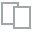
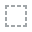
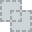
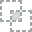
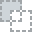
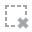
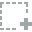
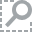
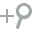
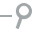
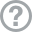
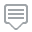
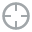
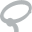
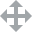
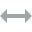
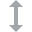
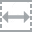
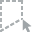
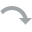
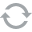
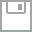
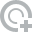
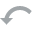
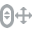
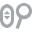
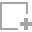
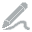
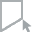
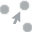
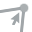
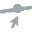

In [106]:
plot(df_original_results[['LIKES','mean_likes','log_LIKES',\
                          'y_test_pred_log','y_test_pred']],"")

In [107]:
df_original_results[['LIKES','mean_likes','log_LIKES','y_test_pred_log','y_test_pred']].sample(2)

Series1 = df_original_results.LIKES
Series2= df_original_results.mean_likes
series3 = df_original_results.y_test_pred
series4 = series3 - Series1 # diff perd and real
series5 = series3 - Series2 # diff perd and mean 
series8 = Series2 - Series1 # diff mean and real
series6 = (series3 / Series1 *100) -100
series7 = (Series1 / df_original_results.mean_likes *100) - 100
series9 = (Series2 / Series1 *100) - 100
res = round(pd.DataFrame({'real_like': Series1, 'like_predication': series3, \
                          'mean likes':Series2, \
                     'diff between like_predication and real_like': series4, \
                     'diff between like_predication and mean like': series5
                     
                     ,'diff between like_mean and real like': series8 \
                      ,'% diff between like_predication and real_like': series6, \
                      '% diff between like_predication and mean like': series7 \
                      ,'% diff between like_mean and real like': series9 #\
                     #, 'mean_-1_same_0_perd_1':  abs(series6) - abs(series9)
                     }                   ))


res['mean_-1_same_0_perd_1'] =  res.apply(lambda row: what_is_better(row['% diff between like_predication and mean like'],10), axis=1)

In [108]:
res.sample(6)

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
1617                 23.0              43.0        13.0   
32677                34.0              82.0        62.0   
2543                405.0             141.0       657.0   
19014                67.0              67.0        68.0   
4916                146.0             569.0       113.0   
38571                48.0              46.0        55.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
1617                                                   20.0   
32677                                                  48.0   
2543                                                 -264.0   
19014                                                  -0.0   
4916                                                  423.0   
38571                                                  -2.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
1617                                                   31.0   
32677                                                  20.0   
2543                                                 -516.0   
19014                                                  -2.0   
4916                                                  456.0   
38571                                                  -9.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
1617                                           -10.0   
32677                                           28.0   
2543                                           252.0   
19014                                            2.0   
4916                                           -33.0   
38571                                            7.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
1617                                                     89.0   
32677                                                   140.0   
2543                                                    -65.0   
19014                                                    -0.0   
4916                                                    289.0   
38571                                                    -4.0   

                % diff between like_predication and mean like  \
LINE_NUM_INDEX                                                  
1617                                                     80.0   
32677                                                   -45.0   
2543                                                    -38.0   
19014                                                    -2.0   
4916                                                     29.0   
38571                                                   -13.0   

                % diff between like_mean and real like  mean_-1_same_0_perd_1  
LINE_NUM_INDEX                                                                 
1617                                             -45.0                    1.0  
32677                                             83.0                   -1.0  
2543                                              62.0                   -1.0  
19014                                              2.0                    0.0  
4916                                             -23.0                    1.0  
38571                                             15.0                   -1.0

In [109]:
res['mean_-1_same_0_perd_1'].median()
res['mean_-1_same_0_perd_1'].mean()

-0.011794439764111205


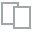
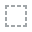
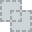
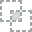
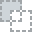
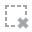
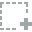
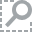
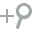
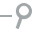
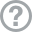
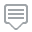
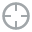
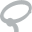
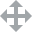
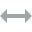
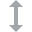
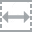
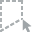
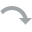
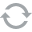
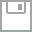
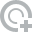
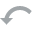
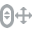
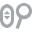
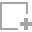
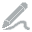
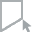
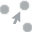
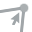
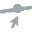

In [110]:
plot(res, "diff between like_predication and mean like")


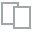
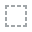
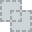
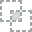
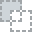
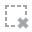
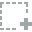
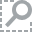
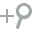
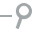
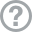
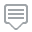
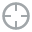
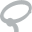
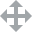
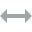
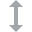
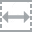
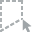
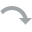
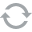
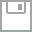
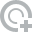
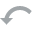
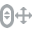
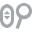
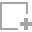
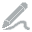
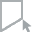
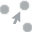
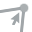
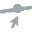

In [111]:
plot(res, "diff between like_predication and real_like")

In [112]:
#spaCy, NLTK, Stanford NLP

Eladk End 2021-Oct-28

In [113]:
# Series1 = 10**X_test_copy.y_test_pred
# #Series2= X_test.mean_likes
# #X_test_mean_likes
# series3 = 10**y_test
# series4 = series3 - Series1
# series5 = Series1 - Series2 #X_test_mean_likes
# # series6 = series3 / Series1 *100
# # series7 = Series1 / X_test_mean_likes *100
# res = round(pd.DataFrame({'like_predication': Series1,\ #'mean_likes': X_test_mean_likes \
#                      'real_like': series3, \
#                     'diff between like_predication and real_like': series4, \
#                     'diff between like_predication and mean like': series5
#                     # ,'% diff between like_predication and real_like': series6, \
#                     # '% diff between like_predication and mean like': series7
#                     }                   ))

In [114]:
# res.sample(10)

In [115]:
# #boston = load_boston()
# sorted_idx = XGB_reg_likes.feature_importances_.argsort()
# #plt.barh
# df_feature_importances = pd.DataFrame(XGB_reg_likes.feature_importances_[sorted_idx])
# df_feature_importances_headers = pd.DataFrame(X.columns[sorted_idx])
# #plt.xlabel("Xgboost Feature Importance")

XGBoost feature Importances

In [116]:
sorted_idx = XGB_reg_likes.feature_importances_.argsort()
pd.DataFrame(XGB_reg_likes.feature_importances_[sorted_idx], 
             index=list(X.columns[sorted_idx]),
             columns=["Feature_Value"]).sort_values(by="Feature_Value",ascending=False).head(20)

Feature_Value
FOLLOWER                                     0.462486
HUMAN                                        0.112843
ACCESSIBILITY_CAPTION_after_trgt_encdr       0.054310
LOCATION_after_trgt_encdr                    0.043138
IMAGE_LABELS_DUMMIES_TOP_VALUES_SUM          0.040624
DATA_SOURCE_OBJECT_AS_INT                    0.034606
CAPTION_after_trgt_encdr                     0.018114
NUMBER_OF_AT_IN_ACCESSIBILITY_CAPTION        0.017485
CAPTION_INTEREST_after_trgt_encdr            0.011854
POSTER                                       0.011484
ACCESSIBILITY_CAPTION_OBJECT_AS_INT          0.010761
YEAR                                         0.010386
CITY_after_trgt_encdr                        0.010295
NUMBER_OF_AT_IN_CAPTION                      0.009966
CAPTION_OBJECT_AS_INT                        0.009186
MONTH                                        0.008748
IMAGE_LABELS_OBJECT_AS_INT                   0.008037
IMAGE_LABELS_after_trgt_encdr                0.007957
count_of_posts_by_username                   0.007581
SHOE                                         0.007179

# Pipeline 6 Evaluate the Model Results

Eladk 2022-Mar-04

In [117]:
#results_and_data_analysis =  'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/results_and_data_analysis_for_download.csv'

#results_and_data_analysis = pd.read_csv(results_and_data_analysis, index_col=0)

# concat res and original:

results_and_data_analysis = pd.concat([res,df_original_results
                                       #df_original, X_test_result,df_image_style
                                       ], axis=1, join="inner")

In [118]:
res.head()

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
9                   284.0              79.0       229.0   
17                   14.0              30.0        22.0   
26                  392.0             325.0       272.0   
27                  247.0              75.0       229.0   
30                    3.0               8.0         6.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
9                                                    -205.0   
17                                                     16.0   
26                                                    -67.0   
27                                                   -172.0   
30                                                      5.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
9                                                    -150.0   
17                                                      7.0   
26                                                     53.0   
27                                                   -154.0   
30                                                      2.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
9                                              -55.0   
17                                               8.0   
26                                            -120.0   
27                                             -18.0   
30                                               2.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
9                                                       -72.0   
17                                                      113.0   
26                                                      -17.0   
27                                                      -70.0   
30                                                      151.0   

                % diff between like_predication and mean like  \
LINE_NUM_INDEX                                                  
9                                                        24.0   
17                                                      -37.0   
26                                                       44.0   
27                                                        8.0   
30                                                      -45.0   

                % diff between like_mean and real like  mean_-1_same_0_perd_1  
LINE_NUM_INDEX                                                                 
9                                                -19.0                    1.0  
17                                                60.0                   -1.0  
26                                               -31.0                    1.0  
27                                                -7.0                    0.0  
30                                                83.0                   -1.0

In [119]:
from scipy import stats

In [120]:
#remove outliers
#results_and_data_analysis_no_outliers = (
# results_and_data_analysis[['like_predication','real_like']][(np.abs(stats.zscore(results_and_data_analysis[['like_predication','real_like']])) < 3).all(axis=1)].index
#)

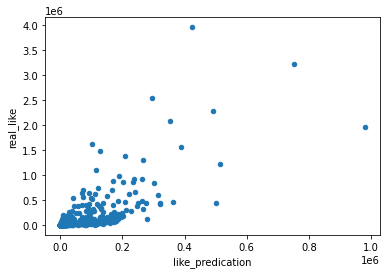

In [121]:
res.plot.scatter(x='like_predication',
                       y='real_like',
                       #c='DarkBlue'
)

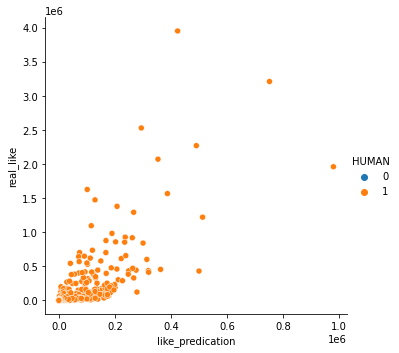

In [122]:
sns.relplot(data=results_and_data_analysis, x='like_predication', y='real_like'
, hue='HUMAN'
#, hue='SWIMWEAR'
#, hue='UNDERWEAR'
#, hue='CITY_after_trgt_encdr'
#, hue='CITY_after_trgt_encdr'
#, hue_order='HEMAN',aspect=1.61
)
plt.show()

In [123]:
results_and_data_analysis

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
9                   284.0              79.0       229.0   
17                   14.0              30.0        22.0   
26                  392.0             325.0       272.0   
27                  247.0              75.0       229.0   
30                    3.0               8.0         6.0   
...                   ...               ...         ...   
38739                87.0              95.0        85.0   
38742                65.0              60.0        85.0   
38758                61.0              87.0        85.0   
38763               113.0             161.0        85.0   
38765               231.0              88.0        85.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
9                                                    -205.0   
17                                                     16.0   
26                                                    -67.0   
27                                                   -172.0   
30                                                      5.0   
...                                                     ...   
38739                                                   8.0   
38742                                                  -5.0   
38758                                                  26.0   
38763                                                  48.0   
38765                                                -143.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
9                                                    -150.0   
17                                                      7.0   
26                                                     53.0   
27                                                   -154.0   
30                                                      2.0   
...                                                     ...   
38739                                                  10.0   
38742                                                 -25.0   
38758                                                   3.0   
38763                                                  76.0   
38765                                                   4.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
9                                              -55.0   
17                                               8.0   
26                                            -120.0   
27                                             -18.0   
30                                               2.0   
...                                              ...   
38739                                           -2.0   
38742                                           20.0   
38758                                           24.0   
38763                                          -28.0   
38765                                         -146.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
9                                                       -72.0   
17                                                      113.0   
26                                                      -17.0   
27                                                      -70.0   
30                                                      151.0   
...                                                       ...   
38739                                                     9.0   
38742                                                    -8.0   
38758                                                    43.0   
38763                                                    42.0   
38765                                                   -62.0   

                % diff between li

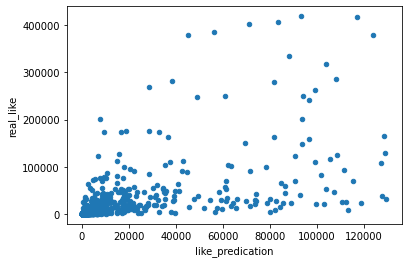

In [124]:
res[['like_predication','real_like','mean_-1_same_0_perd_1']][(np.abs(stats.zscore(res[['like_predication','real_like']])) < 3).all(axis=1)].plot.scatter(x='like_predication',
                       y='real_like',
                       #c='mean_-1_same_0_perd_1'
)

In [125]:
#df['Late_In_Days'] = 
#results_and_data_analysis.apply(lambda row: what_is_better(row['% diff between like_predication and mean like'],10), axis=1)

In [126]:
results_and_data_analysis['mean_-1_same_0_perd_1'].value_counts()

-1.0    1436
 1.0    1394
 0.0     731
Name: mean_-1_same_0_perd_1, dtype: int64

In [127]:
table = pd.pivot_table(results_and_data_analysis, 
                       values='% diff between like_predication and mean like',
                       index=['HUMAN'],
                       columns=['mean_-1_same_0_perd_1'], 
                       #aggfunc=np.mean
                       aggfunc='count'
                       )

table

mean_-1_same_0_perd_1  -1.0   0.0   1.0
HUMAN                                  
0                       121    37    70
1                      1315   694  1324

In [128]:
table = pd.pivot_table(results_and_data_analysis[results_and_data_analysis['CITY'].notnull()], 
                       values='% diff between like_predication and mean like',
                       index=['CITY'],
                       columns=['mean_-1_same_0_perd_1'], 
                       #aggfunc=np.sum
                       aggfunc='count'
                       )

table

mean_-1_same_0_perd_1                    -1.0   0.0   1.0
CITY                                                     
059 40 Liptovská Teplicka, Slovakia       NaN   1.0   NaN
07460 Pollença, Balearic Islands, Spain   NaN   1.0   NaN
07800 Ibiza, Balearic Islands, Spain      1.0   1.0   NaN
18-400 Lomza, Poland                      NaN   1.0   NaN
2710 Sintra, Portugal                     NaN   NaN   1.0
...                                       ...   ...   ...
Wroclaw, Poland                           NaN   NaN   1.0
Yerevan, Armenia                          2.0   NaN   NaN
Yukon, OK, USA                            1.0   NaN   NaN
Zürich, Switzerland                       1.0   1.0   1.0
na                                       35.0  15.0  32.0

[628 rows x 3 columns]

In [129]:
# results_and_data_analysis.sort_values(['job','count'],ascending=False).groupby('job').head(3)

In [130]:
results_and_data_analysis_by = results_and_data_analysis.groupby(['HUMAN','mean_-1_same_0_perd_1'])\
                                       .agg(
                                            NUM_OF_LIKES=('mean_-1_same_0_perd_1','count')#,
                                            # Average_OF_LIKES=('LIKES','mean'),
                                            # median_OF_LIKES=('LIKES','median')
                                            )

# per_DAYOFWEEK["NUM_OF_LIKES_IN_THOUSANDS"] = per_DAYOFWEEK['NUM_OF_LIKES']/1000
# per_DAYOFWEEK.plot(y=["NUM_OF_LIKES_IN_THOUSANDS",
#                       "Average_OF_LIKES","median_OF_LIKES"], kind="bar",figsize=(12,8))
# per_DAYOFWEEK

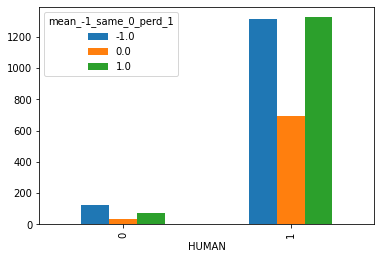

In [131]:
results_and_data_analysis.groupby(['HUMAN','mean_-1_same_0_perd_1']).size().unstack().plot.bar()
#df.groupby(['col1','col2']).size()

# Pipeline 7 Explain and Understanding the model (SHAP)

In [132]:
!pip install shap
import shap
shap.initjs()

     |████████████████████████████████| 564 kB 4.1 MB/s 


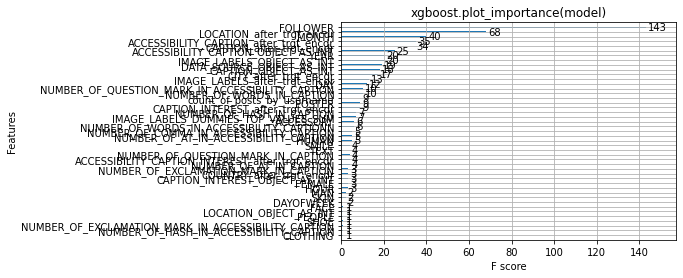

In [133]:
xgb.plot_importance(XGB_reg_likes)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [134]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(XGB_reg_likes)
shap_values = explainer(X)

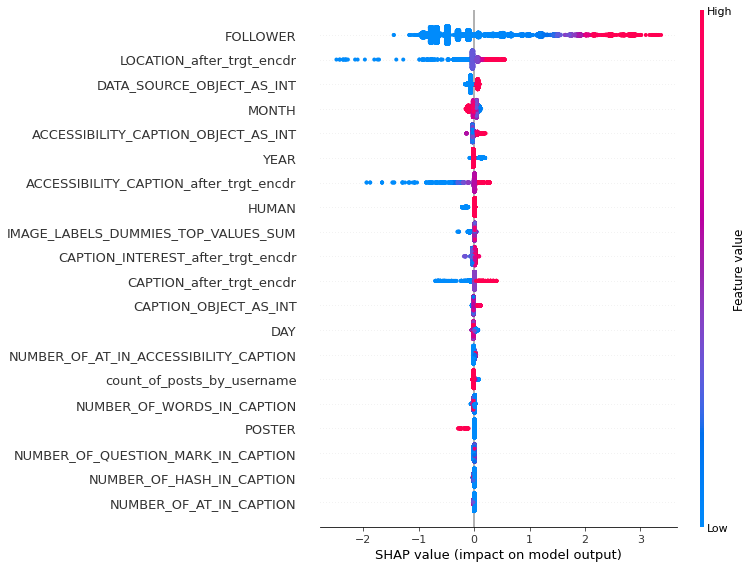

In [135]:
shap.summary_plot(shap_values, X)

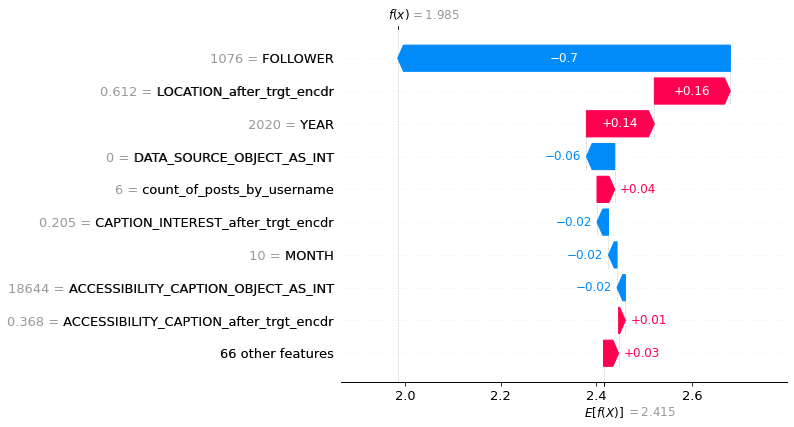

In [136]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[5])

In [137]:
#shap.dependence_plot("YEAR", shap_values, X)

In [138]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X.iloc[0,:])

In [139]:
#explainer.expected_value, shap_values.values[0,:], X.iloc[0,:]

In [140]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [141]:
# visualize all the training set predictions
# shap.initjs()
# shap.plots.force(shap_values)

# Appendix - Data Visualization

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38766 entries, 0 to 38765
Columns: 101 entries, FOLLOWER to DATA_SOURCE_after_trgt_encdr
dtypes: category(4), datetime64[ns](1), float64(29), int64(57), object(10)
memory usage: 28.8+ MB


In [143]:
results_and_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599 entries, 9 to 38765
Columns: 123 entries, real_like to y_test_pred
dtypes: category(4), datetime64[ns](1), float32(3), float64(39), int64(57), object(19)
memory usage: 3.3+ MB


In [144]:
results_and_data_analysis.sample(2)

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
30620             15044.0           45523.0     50019.0   
14573                19.0              55.0        20.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
30620                                               30479.0   
14573                                                  36.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
30620                                               -4496.0   
14573                                                  34.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
30620                                        34975.0   
14573                                            1.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
30620                                                   203.0   
14573                                                   187.0   

                % diff between like_predication and mean like  \
LINE_NUM_INDEX                                                  
30620                                                   -70.0   
14573                                                    -6.0   

                % diff between like_mean and real like  mean_-1_same_0_perd_1  \
LINE_NUM_INDEX                                                                  
30620                                            232.0                   -1.0   
14573                                              6.0                    0.0   

                ... log_COMMENTS            DATETIME  LIKES_RANK  \
LINE_NUM_INDEX  ...                                                
30620           ...     2.008601 2021-12-12 02:55:04   Very High   
14573           ...    -4.000000 2020-07-03 01:07:24        High   

                COMMENTS_RANK  ENGAGEMENT_RANK LIKES_RANK_INT  \
LINE_NUM_INDEX                                                  
30620               Very High             High              3   
14573                     Low        Very High              2   

               COMMENTS_RANK_INT ENGAGEMENT_RANK_INT FOLLOWER_BIN  \
LINE_NUM_INDEX                                                      
30620                          3                   2          Low   
14573                          0                   3          Low   

                 y_test_pred  
LINE_NUM_INDEX                
30620           45523.140625  
14573              54.516720  

[2 rows x 123 columns]

In [145]:
results_and_data_analysis.groupby('USERNAME').size().mean() # 1.78
results_and_data_analysis.groupby('USERNAME').size().median() # 1

1.0

In [146]:
pd.concat([res,df_original], axis=1, join="inner")

real_like  like_predication  mean likes  \
LINE_NUM_INDEX                                            
9                   284.0              79.0       229.0   
17                   14.0              30.0        22.0   
26                  392.0             325.0       272.0   
27                  247.0              75.0       229.0   
30                    3.0               8.0         6.0   
...                   ...               ...         ...   
38739                87.0              95.0        85.0   
38742                65.0              60.0        85.0   
38758                61.0              87.0        85.0   
38763               113.0             161.0        85.0   
38765               231.0              88.0        85.0   

                diff between like_predication and real_like  \
LINE_NUM_INDEX                                                
9                                                    -205.0   
17                                                     16.0   
26                                                    -67.0   
27                                                   -172.0   
30                                                      5.0   
...                                                     ...   
38739                                                   8.0   
38742                                                  -5.0   
38758                                                  26.0   
38763                                                  48.0   
38765                                                -143.0   

                diff between like_predication and mean like  \
LINE_NUM_INDEX                                                
9                                                    -150.0   
17                                                      7.0   
26                                                     53.0   
27                                                   -154.0   
30                                                      2.0   
...                                                     ...   
38739                                                  10.0   
38742                                                 -25.0   
38758                                                   3.0   
38763                                                  76.0   
38765                                                   4.0   

                diff between like_mean and real like  \
LINE_NUM_INDEX                                         
9                                              -55.0   
17                                               8.0   
26                                            -120.0   
27                                             -18.0   
30                                               2.0   
...                                              ...   
38739                                           -2.0   
38742                                           20.0   
38758                                           24.0   
38763                                          -28.0   
38765                                         -146.0   

                % diff between like_predication and real_like  \
LINE_NUM_INDEX                                                  
9                                                       -72.0   
17                                                      113.0   
26                                                      -17.0   
27                                                      -70.0   
30                                                      151.0   
...                                                       ...   
38739                                                     9.0   
38742                                                    -8.0   
38758                                                    43.0   
38763                                                    42.0   
38765                                                   -62.0   

                % diff between li

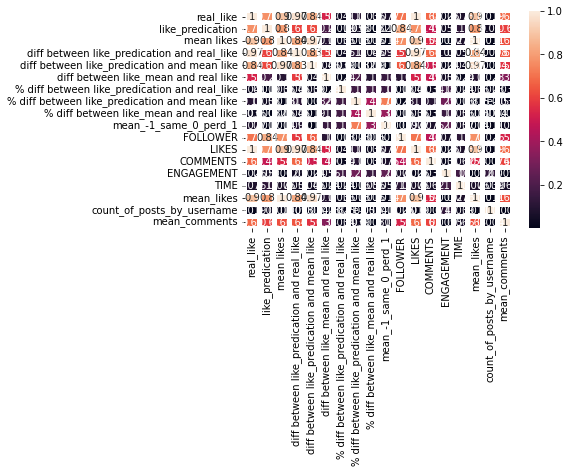

In [147]:
sns.heatmap(pd.concat([res,df_original], axis=1, join="inner").corr().abs(), annot=True, linewidths = 4, 
            #linecolor = "white"
            )

In [1]:
sns.heatmap(pd.concat([y1,X], axis=1, join="inner").corr().abs(), annot=True, linewidths = 4, 
            #linecolor = "white"
            )

NameError: ignored

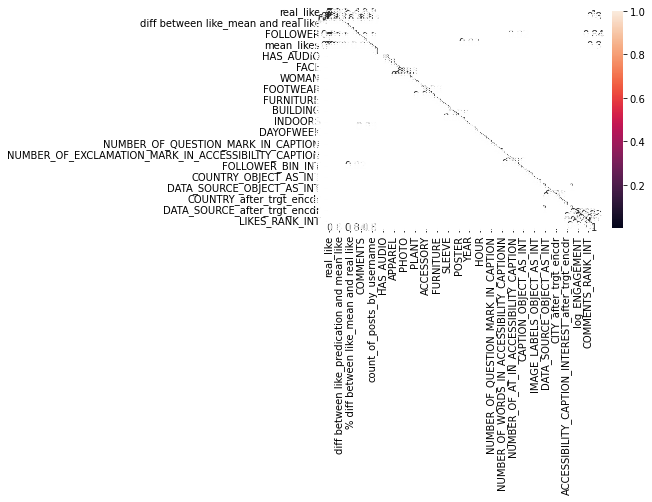

In [148]:
sns.heatmap(results_and_data_analysis.corr().abs(), annot=True, linewidths = 4, 
            #linecolor = "white"
            )

In [149]:
# results_and_data_analysis.to_csv('results_and_data_analysis_for_download.csv') 
# files.download('results_and_data_analysis_for_download.csv')

# results_and_data_analysis.to_csv('data_output_PL6_results_and_data.csv') 
# files.download('data_output_PL6_results_and_data.csv')

75
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755

KeyboardInterrupt: ignored

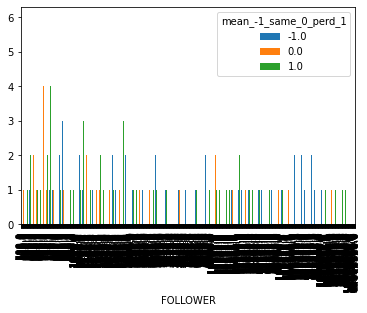

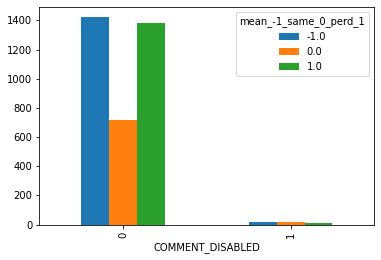

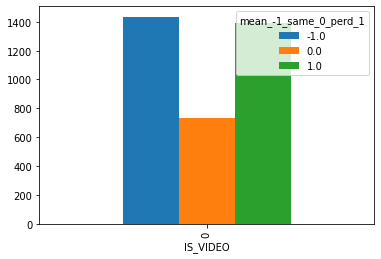

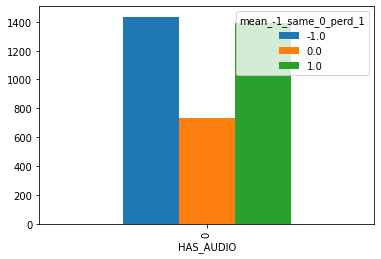

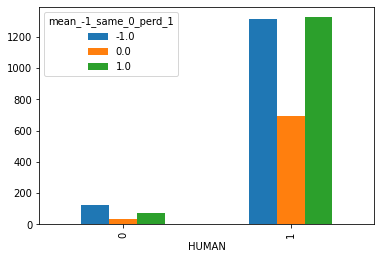

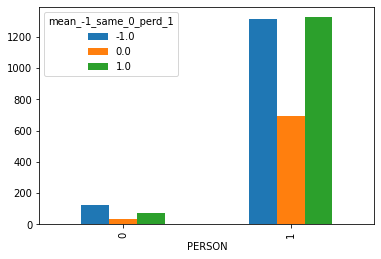

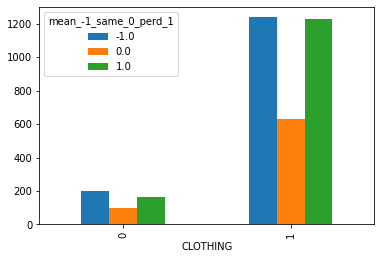

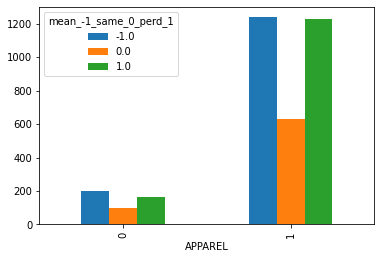

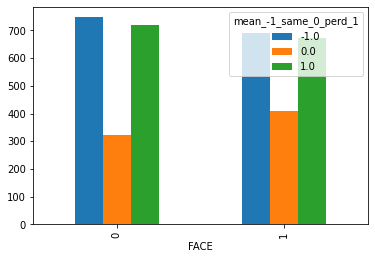

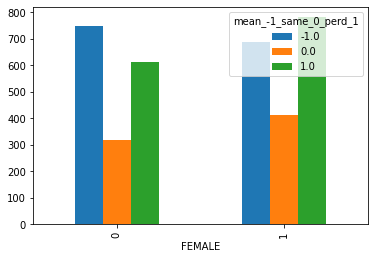

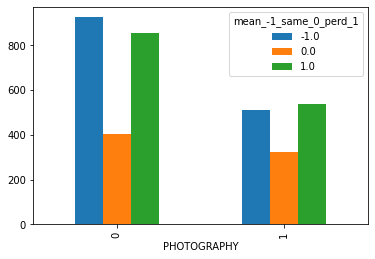

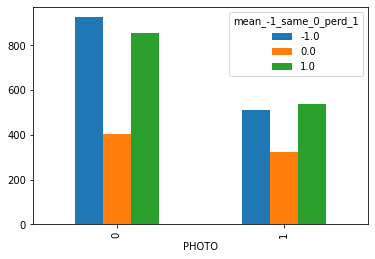

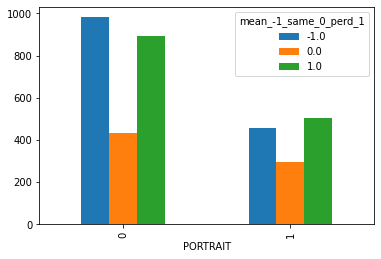

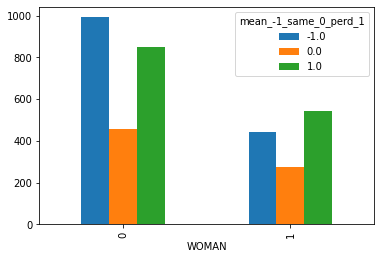

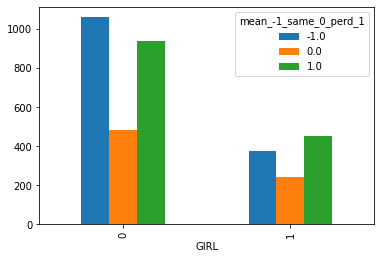

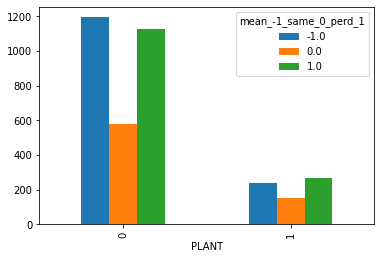

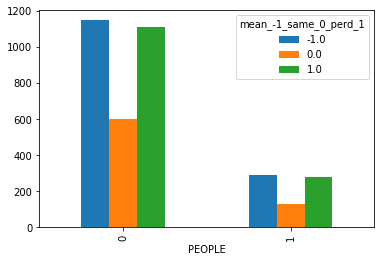

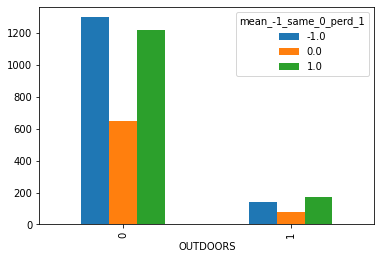

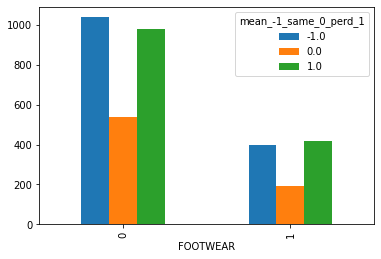

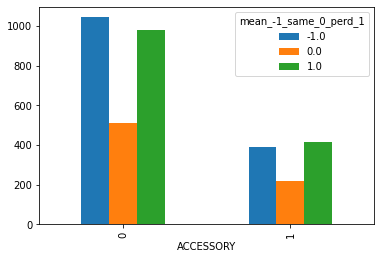

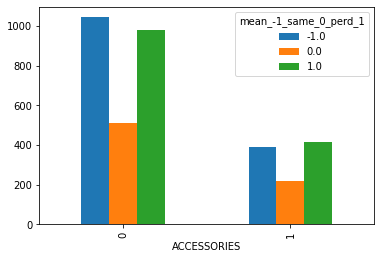

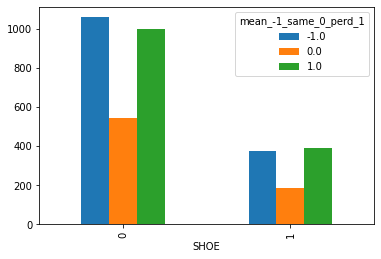

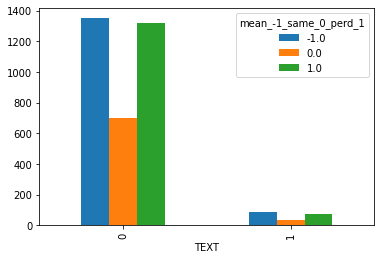

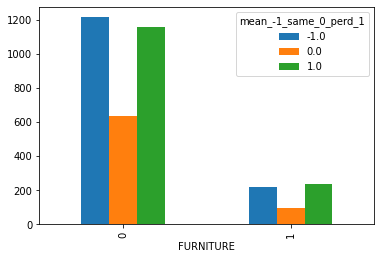

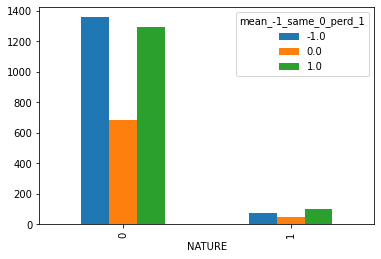

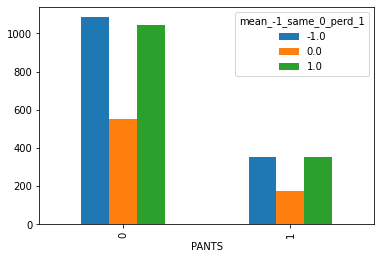

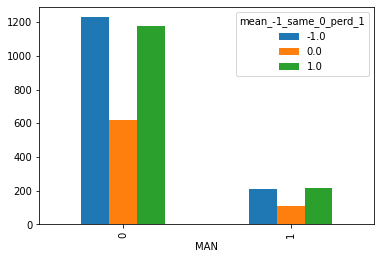

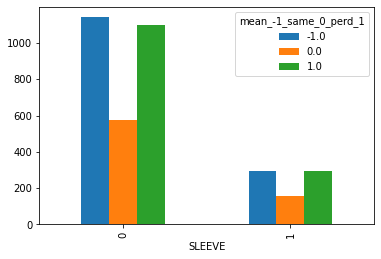

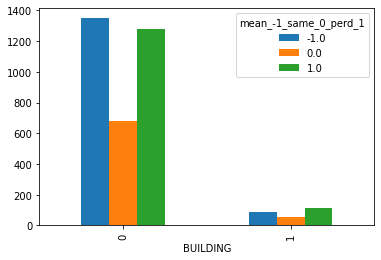

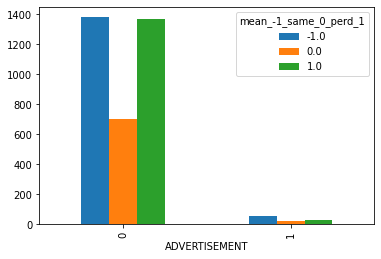

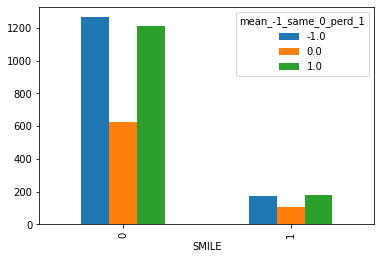

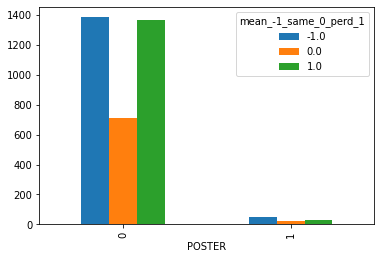

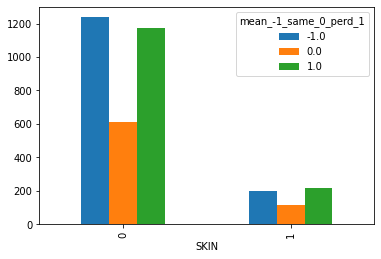

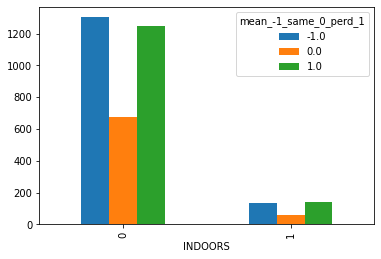

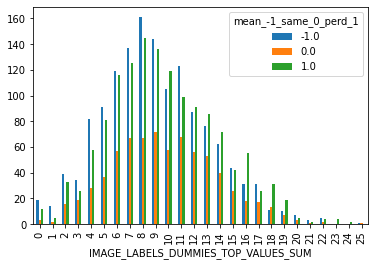

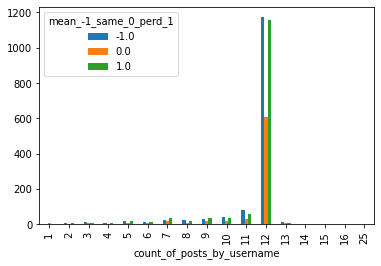

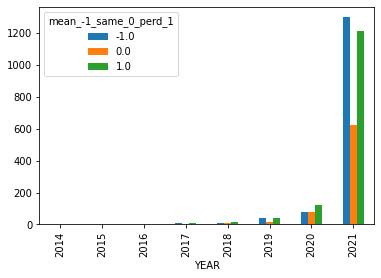

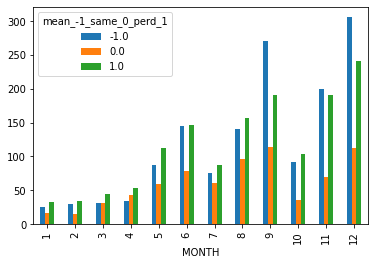

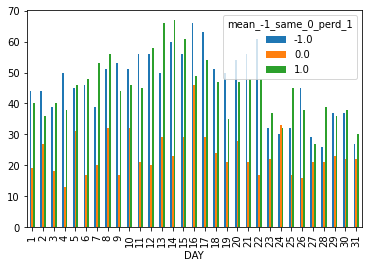

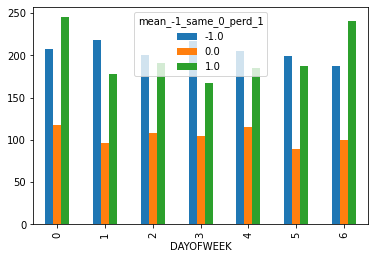

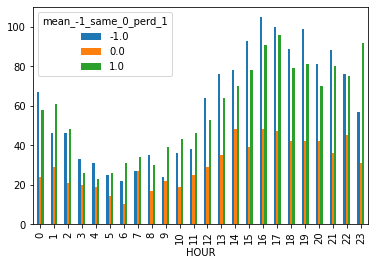

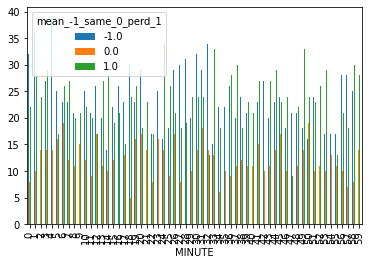

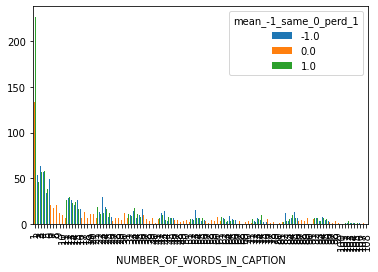

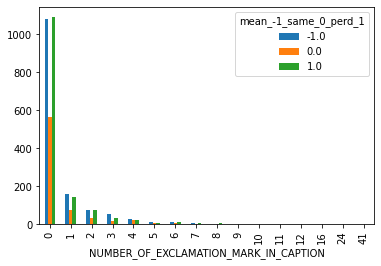

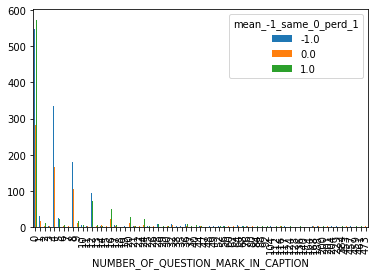

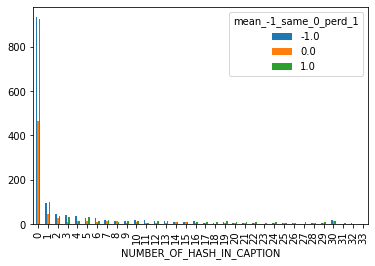

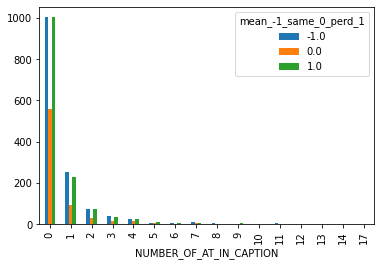

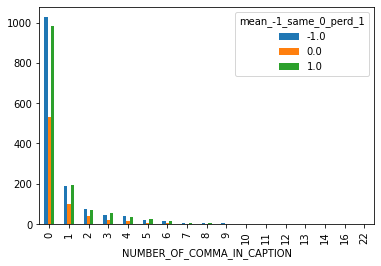

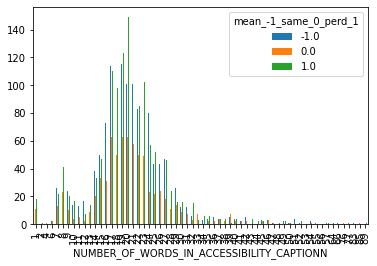

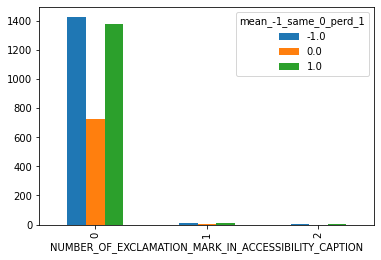

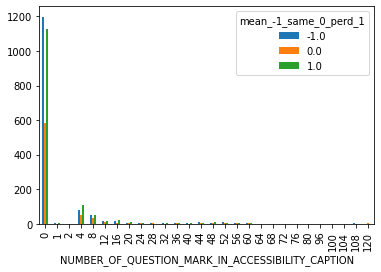

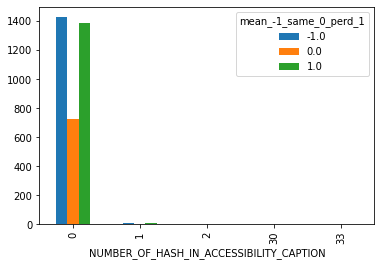

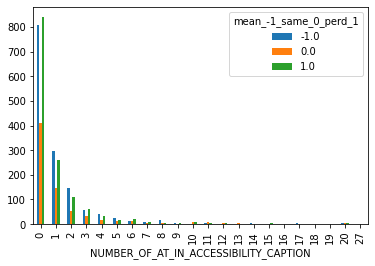

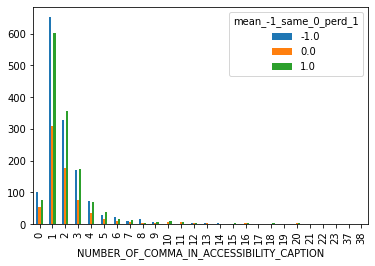

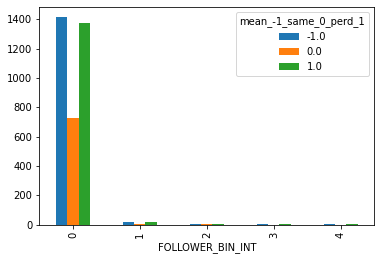

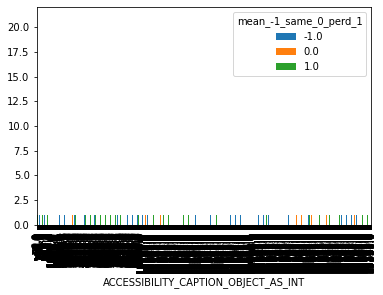

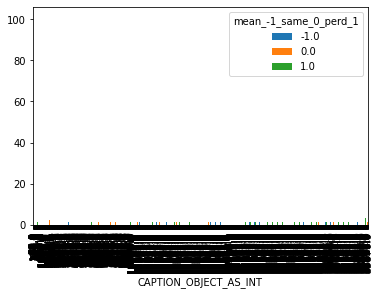

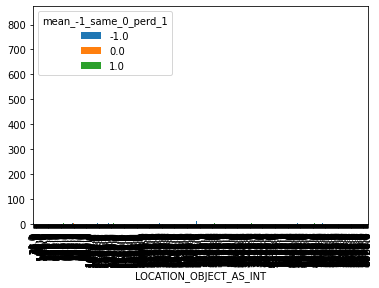

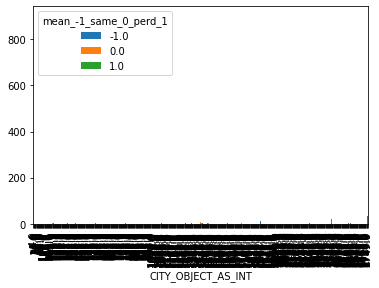

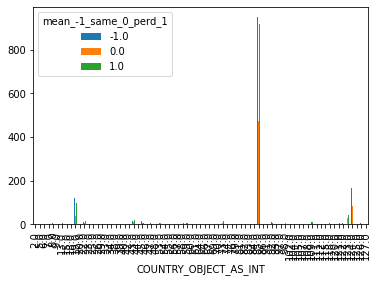

Error in callback <function flush_figures at 0x7fdbb1bc33b0> (for post_execute):


KeyboardInterrupt: ignored

In [150]:
column_list = X.loc[:,~X.columns.duplicated()].columns
print(len(column_list)) # 63

for col in column_list:
  chart = results_and_data_analysis.groupby([col,'mean_-1_same_0_perd_1']) #.size().unstack().plot.bar()

  print(chart.size().unstack().plot.bar())